In [2]:
import sys
import matplotlib
import pandas
import sklearn
import seaborn


In [3]:
print(pandas.__version__)
print(matplotlib.__version__)

0.24.1
3.0.2


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [5]:
games = pandas.read_csv("games.csv")
print(games.shape)
print(games.columns)

(81312, 20)
Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


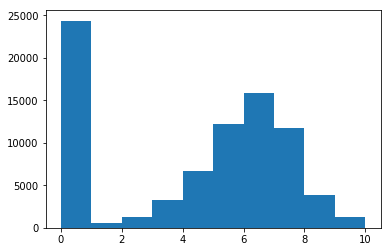

In [6]:
plt.hist(games["average_rating"])
plt.show()

In [7]:
#Print the first row with score = 0
print(games[games["average_rating"] == 0].iloc[0])#Selecting data by row numbers (.iloc)

#Print the first row with score > 0
print(games[games["average_rating"] > 0].iloc[0])



id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

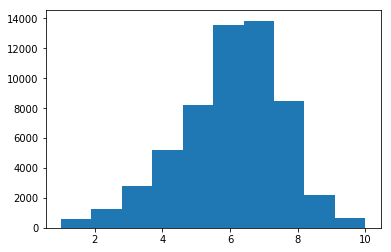

In [8]:
#Remove any row without user review
games = games[games["users_rated"] > 0]

#Remove any row with missing values
games = games.dropna(axis=0)

#Make a histogram of all average ratings
plt.hist(games["average_rating"])
plt.show()


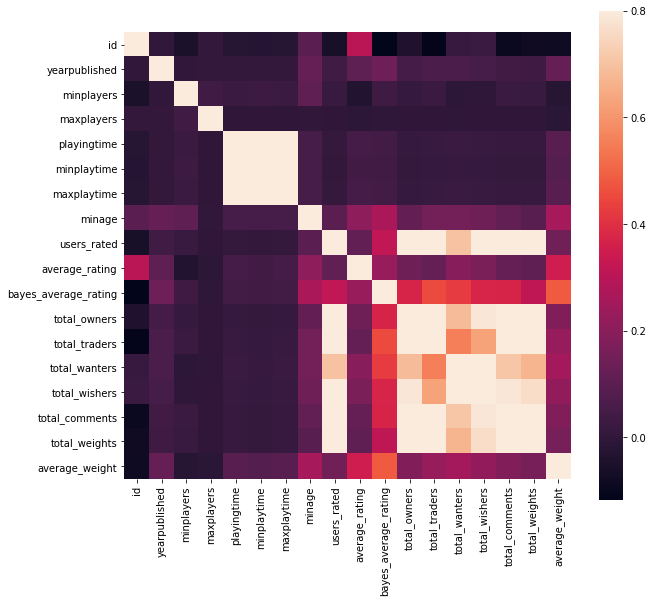

In [9]:
#coorelation matrix

corrmat = games.corr() #part of pandas data frame

fig = plt.figure(figsize = (10,9))

sns.heatmap(corrmat, vmax = .8 , square = True)
plt.show()


In [10]:
#Get all the columns from the dataFrame
columns = games.columns.tolist()


#Filter the columns from the data we don't want
columns = [c for c in columns if c not in ["bayes_average_rating","average_rating","type","name","id"]]

#Store the variables we will be predicting on
target = "average_rating"




In [11]:
#Generate training and test datasets
from sklearn.model_selection import train_test_split


#Generate training set
train = games.sample(frac = 0.8, random_state = 1)

#Select anything not in the training set and put in the test
test = games.loc[~games.index.isin(train.index)]

print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [12]:
#Import Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Initialize the model class
LR = LinearRegression()
#Get all the columns from the dataFrame
columns = games.columns.tolist()


#Filter the columns from the data we don't want
columns = [c for c in columns if c not in ["bayes_average_rating","average_rating","type","name","id"]]
target = "average_rating"
#Fit the medel the training data
LR.fit(train[columns],train[target])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
#Generate predictions for the test set
predictions = LR.predict(test[columns])

#Compute error between our test prediction and actual values
mean_squared_error(predictions,test[target])

2.078819032629323

In [14]:
#import the forest regressor model
from sklearn.ensemble import RandomForestRegressor

#Initialize the model
RFR = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, random_state = 1)

#Fit to the data
RFR.fit(train[columns],train[target])



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [15]:
#make predictions
predictions = RFR.predict(test[columns])

#compute the error between our text predictions and actual values
mean_squared_error(predictions, test[target])


1.4458560046071653

In [16]:
test[columns].iloc[90]

yearpublished     2005.0000
minplayers           2.0000
maxplayers           5.0000
playingtime         90.0000
minplaytime         60.0000
maxplaytime         90.0000
minage              10.0000
users_rated       3522.0000
total_owners      3402.0000
total_traders      152.0000
total_wanters      171.0000
total_wishers      509.0000
total_comments    1106.0000
total_weights      463.0000
average_weight       2.6307
Name: 475, dtype: float64

In [17]:
#Make predictions with both samples
rating_LR = LR.predict(test[columns].iloc[90].values.reshape(1,-1))
rating_RFR = RFR.predict(test[columns].iloc[90].values.reshape(1,-1))

#Print out the prediction
print(rating_LR)
print(rating_RFR)

[6.60800992]
[6.9624684]
